# Bajaj Allianz Hackthon
### How Customers buy Insurance?

The Challenge
There are various factors that affect customer’s policy purchase decisions in addition to the vast number of channels - digital or otherwise. In this hackathon we want you to:

Create segments of customers based on their persona. The segments should be defined clearly and should not be too similar to each other,
Evaluate weightage of product features for each of the customer segments created,
Create a recommender systems (statistical based model or algorithm) to find the attributes influencing the customer’s preference for product features
Identify effect of market factors affecting these segments

Pipeline for Project:-
- Importing Libraries
- Data Loading
- Data Cleaning
- EDA
- Data preparation
- Data Modeling

<br>
<b>Importing Requried Libraries :-<b>

- Numpy 
- Pandas
- sklearn
- Matplotlib
- Seaborn

In [257]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans

In [258]:
#loading train and test data
train = pd.read_csv('train.csv')
train.head()

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
0,9354,27.0,masters_plus,salaried_pvt,495001.0,trad,5,High,6,Mar-22
1,7823,58.0,graduate_plus,salaried_govt,272001.0,ulip,4,Medium,5,Dec-21
2,6170,52.0,masters_plus,salaried_govt,721101.0,trad,5,High,5,Aug-21
3,9199,52.0,higher_secondary,business,712612.0,trad,3,Medium,2,Mar-22
4,9981,34.0,graduate_plus,salaried_pvt,110085.0,ulip,6,Very_high,6,Mar-22


In [259]:
test = pd.read_csv('test.csv')
test.head()

,ID,AGE,EDUCATION,OCC,PINCODE,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
0,7378,40,graduate_plus,business,581110,4,Medium,4,Nov-21
1,9511,44,graduate_plus,business,282002,5,High,4,Mar-22
2,9642,51,graduate_plus,salaried_pvt,751020,4,High,5,Mar-22
3,6896,48,graduate_plus,professional,834001,3,High,5,Sep-21
4,9833,30,graduate_plus,business,711404,3,Very_low,4,Mar-22


### Data Preparation 

In [260]:
train.shape

(4500, 10)

In [261]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     4500 non-null   int64  
 1   AGE                    4482 non-null   float64
 2   EDUCATION              4500 non-null   object 
 3   OCC                    4500 non-null   object 
 4   PINCODE                4498 non-null   float64
 5   PROD_CATEGORY          4500 non-null   object 
 6   INCOME_SEGMENT         4500 non-null   int64  
 7   PROSPERITY_INDEX_BAND  4500 non-null   object 
 8   QUALITY_SCORE_BAND     4500 non-null   int64  
 9   ISSUANCE_MONTH         4500 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 351.7+ KB


"Age" and "Pincode" column datatype is float, it should be integer. And null values in both columns

In [262]:
train.describe()

,ID,AGE,PINCODE,INCOME_SEGMENT,QUALITY_SCORE_BAND
count,4500.000000,4482.000000,4498.000000,4500.000000,4500.000000
mean,7498.592889,39.096162,489477.655180,3.760889,3.953333
std,1443.264409,11.807838,231229.777775,5.151208,1.172421
min,5001.000000,18.000000,110003.000000,-99.000000,1.000000
25%,6255.750000,30.000000,283203.000000,3.000000,3.000000
50%,7504.500000,37.000000,471405.000000,4.000000,4.000000
75%,8751.250000,46.000000,721193.750000,5.000000,5.000000
max,9999.000000,85.000000,855117.000000,10.000000,6.000000


In [263]:
#checking null values in dataframe
round(train.isnull().mean()*100,2)

ID                       0.00
AGE                      0.40
EDUCATION                0.00
OCC                      0.00
PINCODE                  0.04
PROD_CATEGORY            0.00
INCOME_SEGMENT           0.00
PROSPERITY_INDEX_BAND    0.00
QUALITY_SCORE_BAND       0.00
ISSUANCE_MONTH           0.00
dtype: float64

Missing values in columns AGE and PINCODE are respectively 18 and 2

In [264]:
#Null values in the Age column
train[train['AGE'].isnull()]

,ID,AGE,EDUCATION,OCC,PINCODE,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
454,5180,NaN,missing,missing,110020.0,term,9,High,2,Apr-21
648,7650,NaN,missing,missing,110017.0,ulip,5,Very_high,2,Dec-21
1730,6449,NaN,missing,missing,282004.0,trad,8,High,2,Aug-21
1840,7934,NaN,missing,missing,250001.0,trad,5,High,2,Dec-21
2245,9070,NaN,missing,missing,362001.0,trad,5,High,2,Feb-22
2492,8605,NaN,missing,missing,110054.0,ulip,4,Very_high,2,Jan-22
2527,7404,NaN,missing,salaried_pvt,311001.0,term,5,High,3,Nov-21
2605,5075,NaN,missing,missing,500033.0,trad,6,Very_high,2,Apr-21
2639,5270,NaN,missing,salaried_pvt,370210.0,term,7,High,3,May-21
2684,5499,NaN,missing,missing,711201.0,ulip,5,Medium,2,Jun-21


<AxesSubplot: xlabel='AGE', ylabel='Count'>

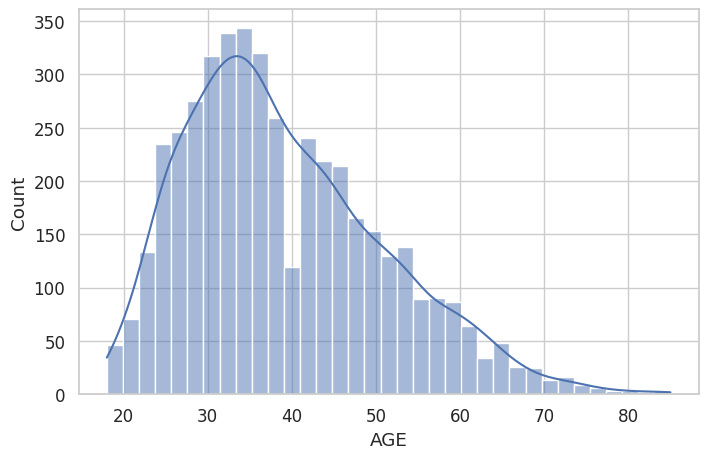

In [265]:
sns.histplot(data=train, x='AGE', kde =True)

<AxesSubplot: xlabel='AGE', ylabel='Count'>

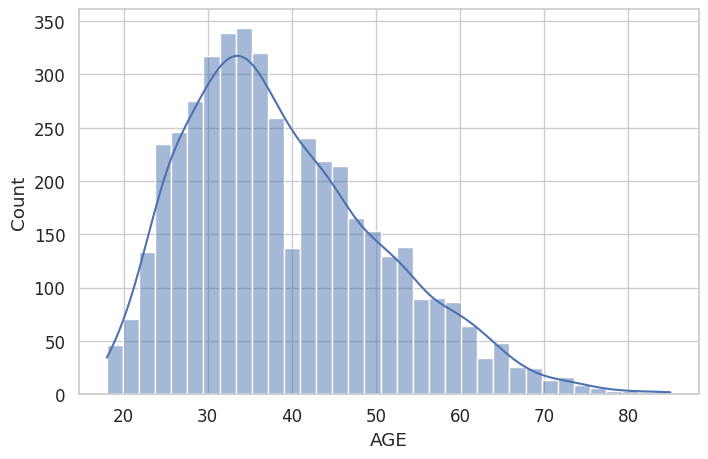

In [266]:
#Imputing missing data with mean value and plotting histogram
df = train.copy()
df['AGE'] = df.AGE.fillna(df.AGE.mean())
sns.histplot(data=df, x='AGE', kde=True)

In [267]:
df.AGE.isnull().sum()

0

Now there is no missing values in data, changing dtype of AGE column.<br>
Dropping ID and PINCODE column, they are not useful for analysis because there is no relation in it.

In [268]:
#changing data type of AGE column
df = df.astype({'AGE': int})
#droping ID and PINCODE column 
df = df.drop(['ID', 'PINCODE'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   AGE                    4500 non-null   int64 
 1   EDUCATION              4500 non-null   object
 2   OCC                    4500 non-null   object
 3   PROD_CATEGORY          4500 non-null   object
 4   INCOME_SEGMENT         4500 non-null   int64 
 5   PROSPERITY_INDEX_BAND  4500 non-null   object
 6   QUALITY_SCORE_BAND     4500 non-null   int64 
 7   ISSUANCE_MONTH         4500 non-null   object
dtypes: int64(3), object(5)
memory usage: 281.4+ KB


In [269]:
df.head()

,AGE,EDUCATION,OCC,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
0,27,masters_plus,salaried_pvt,trad,5,High,6,Mar-22
1,58,graduate_plus,salaried_govt,ulip,4,Medium,5,Dec-21
2,52,masters_plus,salaried_govt,trad,5,High,5,Aug-21
3,52,higher_secondary,business,trad,3,Medium,2,Mar-22
4,34,graduate_plus,salaried_pvt,ulip,6,Very_high,6,Mar-22


### Exploratory Data Analysis (EDA)

Making list of Numeric and Categorical features for Analysis.

In [270]:
#copy of dataframe
df2 = df.copy()
df2.shape

(4500, 8)

In [271]:
#List of Numerical Data
numeric_list = df2.select_dtypes(include=np.number).columns.tolist()
numeric_list

['AGE', 'INCOME_SEGMENT', 'QUALITY_SCORE_BAND']

In [272]:
#List of Categorical data
categorical_list = df2.select_dtypes(exclude=np.number).columns.tolist()
categorical_list

['EDUCATION',
 'OCC',
 'PROD_CATEGORY',
 'PROSPERITY_INDEX_BAND',
 'ISSUANCE_MONTH']

<b>Numerical Features analysis</b>

array([[<AxesSubplot: title={'center': 'AGE'}>,
        <AxesSubplot: title={'center': 'INCOME_SEGMENT'}>,
        <AxesSubplot: title={'center': 'QUALITY_SCORE_BAND'}>,
        <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >,
        <AxesSubplot: >]], dtype=object)

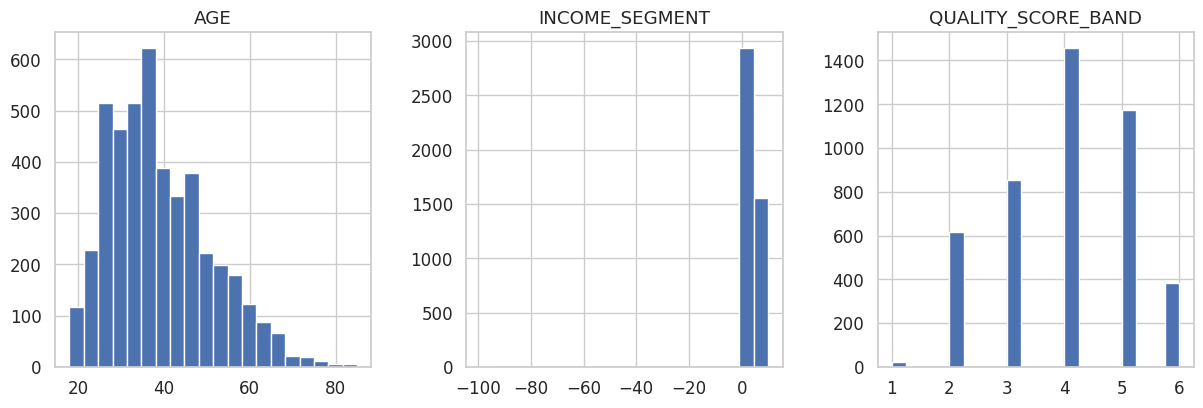

In [273]:
#Ploting Numerical data on historgram
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
df2[numeric_list].hist(bins=20, figsize=(20, 10), layout=(2, 4))

From above plots insights are:-
- Most of the customers are lie between the age of 25 to 40.
- INCOME_SEGMENT have ouliers in it.
- maximum there is high quality score band customers.

In [274]:
#handling missing values in INCOME_SEGMENT which is present as -99 in data. It will producing errors in fitting 
len(df2[df2['INCOME_SEGMENT'] == -99])

10

In [275]:
df2[df2['INCOME_SEGMENT'] == -99]

,AGE,EDUCATION,OCC,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
541,27,matriculation,salaried_pvt,trad,-99,High,4,Feb-22
624,30,graduate_plus,salaried_govt,ulip,-99,Medium,5,Mar-22
1138,50,graduate_plus,business,term,-99,High,4,Apr-21
1660,48,graduate_plus,salaried_pvt,term,-99,Very_high,5,Mar-22
1750,58,graduate_plus,retired,ulip,-99,High,3,Jun-21
1894,36,graduate_plus,salaried_pvt,ulip,-99,Very_high,6,Mar-22
2280,32,graduate_plus,salaried_govt,term,-99,Missing,4,Mar-22
2317,31,masters_plus,salaried_pvt,trad,-99,High,6,Mar-22
3067,32,graduate_plus,professional,term,-99,Very_high,6,Mar-22
3334,42,graduate_plus,business,trad,-99,High,4,Jul-21


Handling missing values in INCOME_SEGMENT which is present as -99 in data. It will produce errors in fitting model. 

In [276]:
#Dropping rows having INCOME_SEGMENT value is -99
df2.drop(df2[df2['INCOME_SEGMENT'] == -99].index, inplace=True)
df2.shape

(4490, 8)

/tmp/ipykernel_4718/262888463.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(


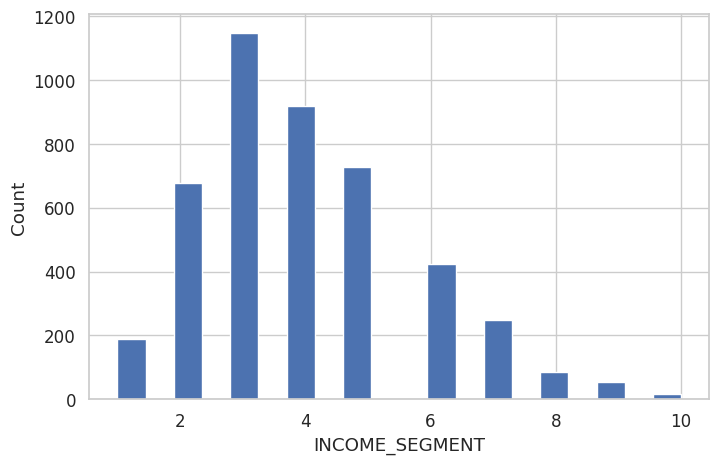

In [277]:
sns.distplot(
    df2['INCOME_SEGMENT'], norm_hist=False, kde=False, bins=20, hist_kws={"alpha": 1}
).set(xlabel='INCOME_SEGMENT', ylabel='Count');

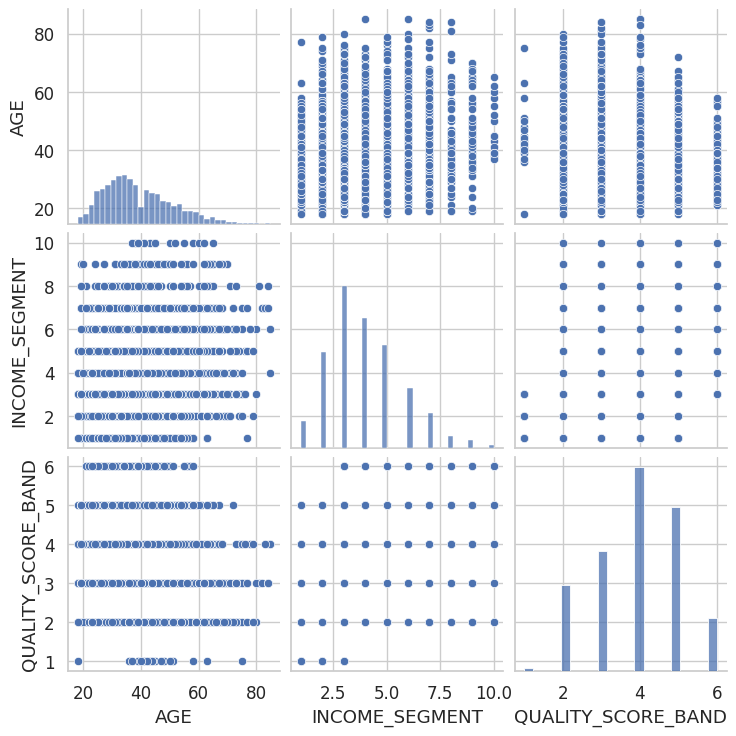

In [278]:
sns.pairplot(data=df2[numeric_list])

<b>Categorical Features Analysis</b>

<AxesSubplot: xlabel='PROD_CATEGORY', ylabel='count'>

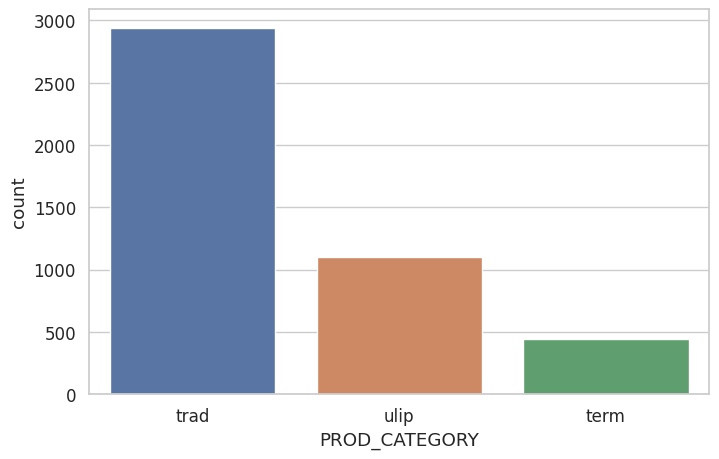

In [279]:
sns.countplot(x='PROD_CATEGORY',data=df2[categorical_list])

most of the customers choose non-market linked policy(trad)

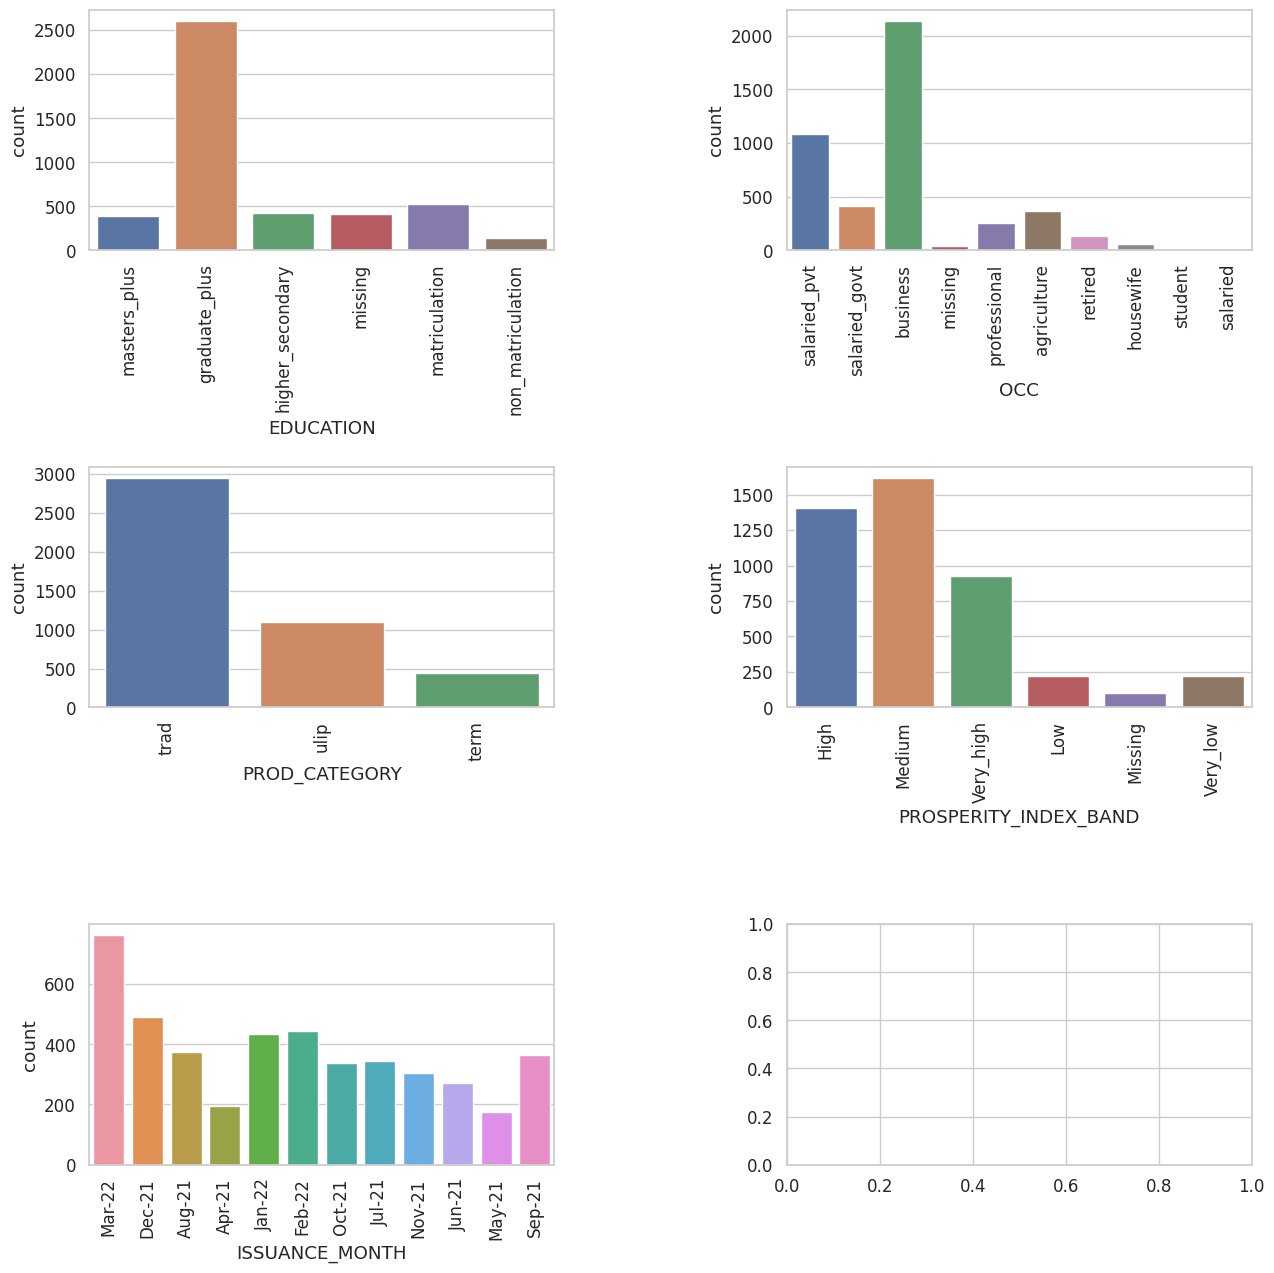

In [280]:
fig, ax = plt.subplots(3, 2, figsize=(15, 15))
fig.subplots_adjust(hspace=0.9, wspace=0.5)
for variable, subplot in zip(df2[categorical_list], ax.flatten()):
    sns.countplot(x=variable,data=df2[categorical_list], ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

Insights:- 
- Most the Customers are graduate plus
- Most the Customers are having business and in private organisation
- Most of the customers bought isurance in March 
- most of the customers choose non-market linked policy(trad)

In [281]:
print(len(df2[df2.PROSPERITY_INDEX_BAND=='Missing']))
print(len(df2[df2.EDUCATION=='missing']))
print(len(df2[df2.OCC=='missing']))

104
407
38


Handling missing values in PROSPERITY_INDEX_BAND, EDUCATION and OCC, which is present as "Missing" in the data. It will produce errors in fitting model. 

In [282]:
df2.drop(df2[df2['PROSPERITY_INDEX_BAND'] == 'Missing'].index, inplace=True)
df2.drop(df2[df2['EDUCATION'] == 'missing'].index, inplace=True)
df2.drop(df2[df2['OCC'] == 'missing'].index, inplace=True)
df2.shape

(3974, 8)

In [283]:
def categorical_plots(col1,col2):
    cstb = pd.crosstab(col1, col2)
    return cstb.plot(kind="bar", figsize=(6,6), stacked=True)

<AxesSubplot: xlabel='OCC'>

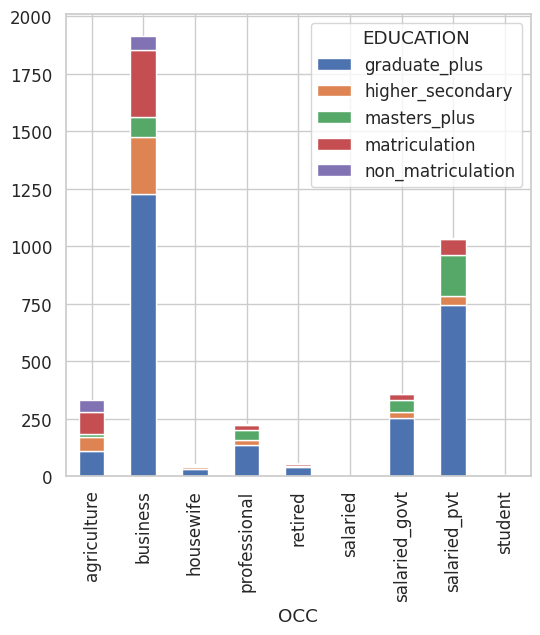

In [284]:
categorical_plots(df2.OCC, df2.EDUCATION)

Insights:- 
- Most of the customers are graduate_plus and doing business
- And there are customers who are in private sector and graduate_plus

<AxesSubplot: xlabel='ISSUANCE_MONTH'>

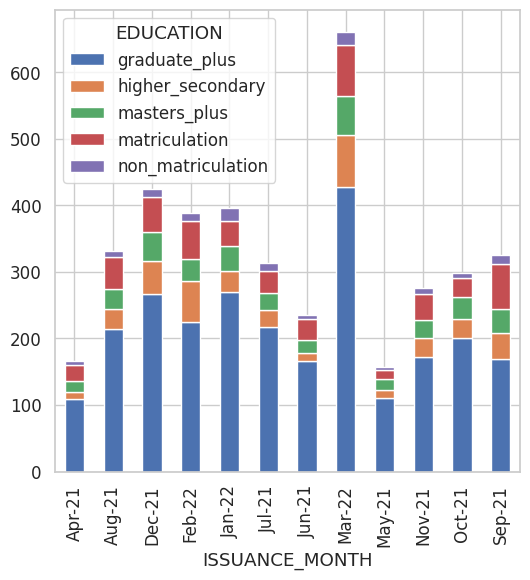

In [285]:
categorical_plots(df2.ISSUANCE_MONTH, df2.EDUCATION)

Insight:-
- Customer's which are graduate_plus are buying insurance in every month, peak was in the month of march

<AxesSubplot: xlabel='PROD_CATEGORY'>

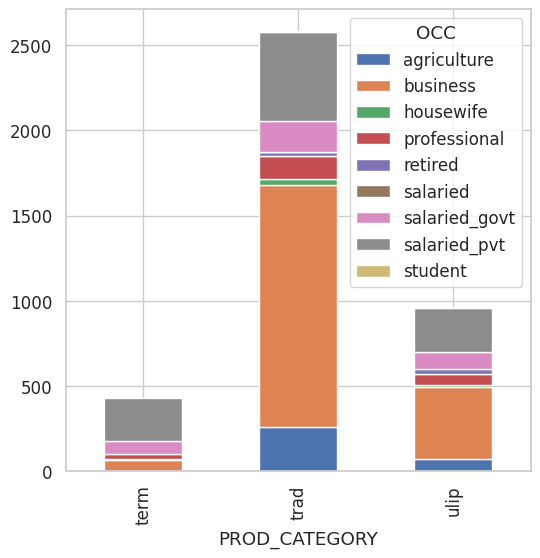

In [286]:
categorical_plots(df2.PROD_CATEGORY, df2.OCC)

Insights:-
- Customers who have business are buying non-market linked policy(trad)

<b>Removing outliers</b>

In [287]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)
IQR = Q3 - Q1

df3 = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
df3.shape

/tmp/ipykernel_4718/3749349747.py:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df2.quantile(0.25)
/tmp/ipykernel_4718/3749349747.py:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df2.quantile(0.75)
/tmp/ipykernel_4718/3749349747.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df3 = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]


(3904, 8)

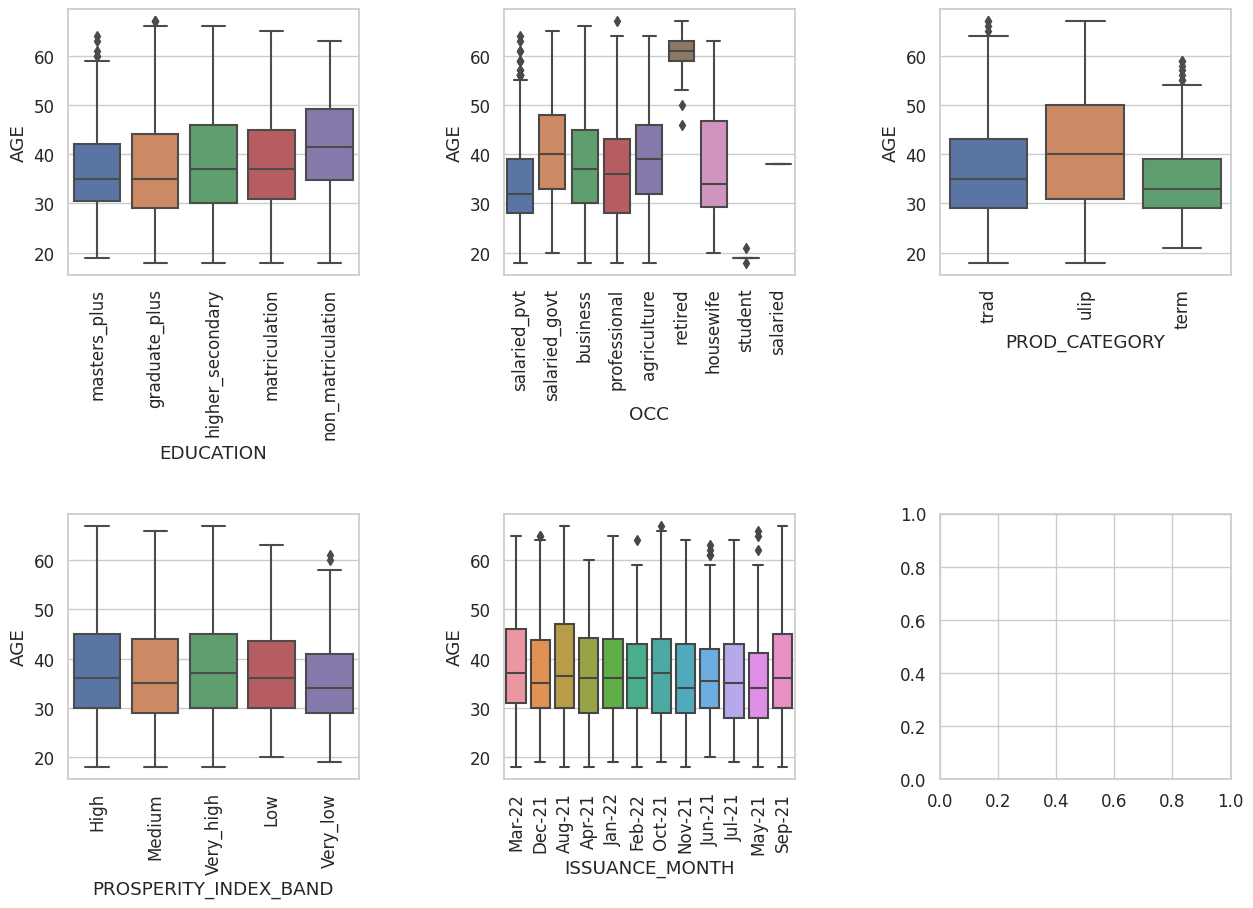

In [288]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.9, wspace=0.5)
for var, subplot in zip(categorical_list, ax.flatten()):
    sns.boxplot(x=var, y='AGE', data=df3, ax=subplot)
    for label in subplot.get_xticklabels():
        label.set_rotation(90)

In [289]:
df3.head()

,AGE,EDUCATION,OCC,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
0,27,masters_plus,salaried_pvt,trad,5,High,6,Mar-22
1,58,graduate_plus,salaried_govt,ulip,4,Medium,5,Dec-21
2,52,masters_plus,salaried_govt,trad,5,High,5,Aug-21
3,52,higher_secondary,business,trad,3,Medium,2,Mar-22
4,34,graduate_plus,salaried_pvt,ulip,6,Very_high,6,Mar-22


## Data Preparation

In [290]:
categorical_list

['EDUCATION',
 'OCC',
 'PROD_CATEGORY',
 'PROSPERITY_INDEX_BAND',
 'ISSUANCE_MONTH']

In [291]:
le = LabelEncoder()
df3['EDUCATION'] = le.fit_transform(df3['EDUCATION'])
df3['OCC'] = le.fit_transform(df3['OCC'])
df3['PROD_CATEGORY'] = le.fit_transform(df3['PROD_CATEGORY'])
df3['PROSPERITY_INDEX_BAND'] = le.fit_transform(df3['PROSPERITY_INDEX_BAND'])
df3.head()

/tmp/ipykernel_4718/4042710296.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['EDUCATION'] = le.fit_transform(df3['EDUCATION'])
/tmp/ipykernel_4718/4042710296.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['OCC'] = le.fit_transform(df3['OCC'])
/tmp/ipykernel_4718/4042710296.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/

,AGE,EDUCATION,OCC,PROD_CATEGORY,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
0,27,2,7,1,5,0,6,7
1,58,0,6,2,4,2,5,2
2,52,2,6,1,5,0,5,1
3,52,1,1,1,3,2,2,7
4,34,0,7,2,6,3,6,7


In [292]:
df4 = df3.copy()
df4.head()

,AGE,EDUCATION,OCC,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
0,27,2,7,5,0,6,7
1,58,0,6,4,2,5,2
2,52,2,6,5,0,5,1
3,52,1,1,3,2,2,7
4,34,0,7,6,3,6,7


In [293]:
ohe = OneHotEncoder(drop='first', handle_unknown="ignore")
df4_val = df4[['EDUCATION','OCC', 'PROSPERITY_INDEX_BAND', 'ISSUANCE_MONTH']].values
list_cat = ['EDUCATION','OCC', 'PROSPERITY_INDEX_BAND', 'ISSUANCE_MONTH']

In [294]:
ct = ColumnTransformer(transformers=[('cat',ohe, [0,1,2,3])], remainder = 'passthrough')

In [295]:
X = ct.fit_transform(df4_val)
X = X.toarray()
df_ohe = pd.DataFrame(X, index=df3.index, columns=ct.get_feature_names_out())
df_ohe

,cat__x0_1,cat__x0_2,cat__x0_3,cat__x0_4,cat__x1_1,cat__x1_2,cat__x1_3,cat__x1_4,cat__x1_5,cat__x1_6,cat__x1_7,cat__x1_8,cat__x2_1,cat__x2_2,cat__x2_3,cat__x2_4,cat__x3_1,cat__x3_2,cat__x3_3,cat__x3_4,cat__x3_5,cat__x3_6,cat__x3_7,cat__x3_8,cat__x3_9,cat__x3_10,cat__x3_11
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4495,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4496,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4497,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4498,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


## Data Modeling

#### Elbow Plot for determining value of k

In [296]:
merge_df = pd.concat([df4.drop(['EDUCATION','OCC', 'PROSPERITY_INDEX_BAND', 'ISSUANCE_MONTH'], axis=1), df_ohe], axis=1)
merge_df.head()

,AGE,INCOME_SEGMENT,QUALITY_SCORE_BAND,cat__x0_1,cat__x0_2,cat__x0_3,cat__x0_4,cat__x1_1,cat__x1_2,cat__x1_3,cat__x1_4,cat__x1_5,cat__x1_6,cat__x1_7,cat__x1_8,cat__x2_1,cat__x2_2,cat__x2_3,cat__x2_4,cat__x3_1,cat__x3_2,cat__x3_3,cat__x3_4,cat__x3_5,cat__x3_6,cat__x3_7,cat__x3_8,cat__x3_9,cat__x3_10,cat__x3_11
0,27,5,6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,58,4,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52,5,5,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,52,3,2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,34,6,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [297]:
sse = []
k_rng = range(1,10)
for i in k_rng:
    km = KMeans(n_clusters=i)
    km.fit(merge_df)
    sse.append(km.inertia_)

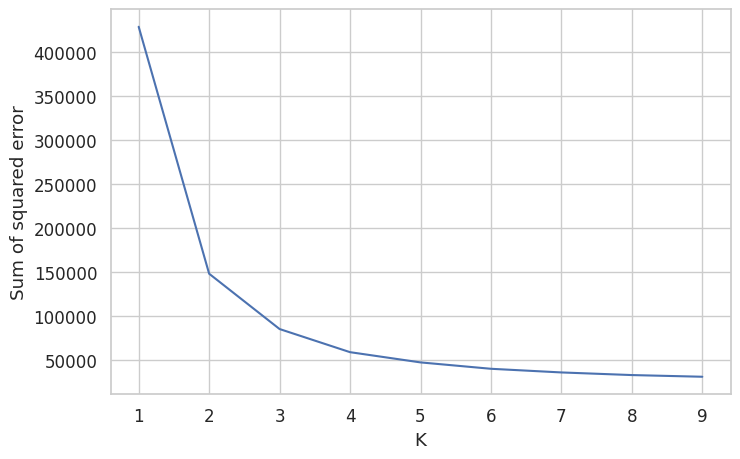

In [298]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng, sse)

Value of K is 3 according to elbow plot

In [299]:
scaler = MinMaxScaler()
for i in merge_df:
    merge_df[i] = scaler.fit_transform(merge_df[[i]])
merge_df.head()

,AGE,INCOME_SEGMENT,QUALITY_SCORE_BAND,cat__x0_1,cat__x0_2,cat__x0_3,cat__x0_4,cat__x1_1,cat__x1_2,cat__x1_3,cat__x1_4,cat__x1_5,cat__x1_6,cat__x1_7,cat__x1_8,cat__x2_1,cat__x2_2,cat__x2_3,cat__x2_4,cat__x3_1,cat__x3_2,cat__x3_3,cat__x3_4,cat__x3_5,cat__x3_6,cat__x3_7,cat__x3_8,cat__x3_9,cat__x3_10,cat__x3_11
0,0.183673,0.571429,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.816327,0.428571,0.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.693878,0.571429,0.8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.693878,0.285714,0.2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.326531,0.714286,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [300]:
from sklearn.decomposition import PCA
pca = PCA()
reduced_data = pca.fit_transform(merge_df)
reduced_data.shape

(3904, 30)

In [301]:
reduced_data

array([[ 1.00553321e+00, -1.86934589e-02,  8.42326880e-01, ...,
         7.19601169e-02,  1.18628002e-03, -2.06106102e-03],
       [-3.74565284e-02, -7.46109315e-01, -1.16294780e-02, ...,
         5.63581896e-02,  1.15762422e-02, -2.02366142e-03],
       [ 4.64197142e-01, -6.60933009e-03, -7.89791011e-02, ...,
        -3.32680986e-02,  4.38828504e-03,  1.64924488e-03],
       ...,
       [-7.32443950e-01, -2.49208430e-01, -4.64808670e-02, ...,
        -1.07608515e-02, -3.52483239e-03,  5.18394746e-04],
       [-3.71297730e-01,  6.84811338e-01,  7.70939111e-01, ...,
        -1.97771400e-03, -3.21887703e-03,  8.63064757e-04],
       [-7.24870192e-01, -1.31888577e-02,  9.97152328e-01, ...,
         4.99989323e-02,  3.38456441e-03, -7.23514785e-04]])

In [302]:
variance_ratio = pca.explained_variance_ratio_
variance_ratio.shape

(30,)

In [303]:
variation_ratio_df = pd.DataFrame([variance_ratio], columns = merge_df.columns)
pd.set_option('display.max_columns', None)
variation_ratio_df

,AGE,INCOME_SEGMENT,QUALITY_SCORE_BAND,cat__x0_1,cat__x0_2,cat__x0_3,cat__x0_4,cat__x1_1,cat__x1_2,cat__x1_3,cat__x1_4,cat__x1_5,cat__x1_6,cat__x1_7,cat__x1_8,cat__x2_1,cat__x2_2,cat__x2_3,cat__x2_4,cat__x3_1,cat__x3_2,cat__x3_3,cat__x3_4,cat__x3_5,cat__x3_6,cat__x3_7,cat__x3_8,cat__x3_9,cat__x3_10,cat__x3_11
0,0.169205,0.115779,0.063208,0.05843,0.05593,0.047593,0.043,0.042385,0.039619,0.037164,0.034336,0.03377,0.031397,0.03002,0.029135,0.027182,0.024946,0.021575,0.019903,0.017404,0.016946,0.013526,0.008849,0.007574,0.004816,0.003238,0.001493,0.000863,0.000611,0.000103


In [304]:
km = KMeans(n_clusters=3)
yp = km.fit_predict(merge_df[["AGE", 'INCOME_SEGMENT']])
yp

array([0, 1, 1, ..., 2, 0, 0], dtype=int32)

In [305]:
pca_df = merge_df[['AGE', 'INCOME_SEGMENT']]
pca_df['clusters'] = yp
pca_df

/tmp/ipykernel_4718/2346553803.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pca_df['clusters'] = yp


,AGE,INCOME_SEGMENT,clusters
0,0.183673,0.571429,0
1,0.816327,0.428571,1
2,0.693878,0.571429,1
3,0.693878,0.285714,1
4,0.326531,0.714286,0
...,...,...,...
4495,0.367347,0.428571,2
4496,0.244898,0.285714,2
4497,0.183673,0.285714,2
4498,0.489796,0.857143,0


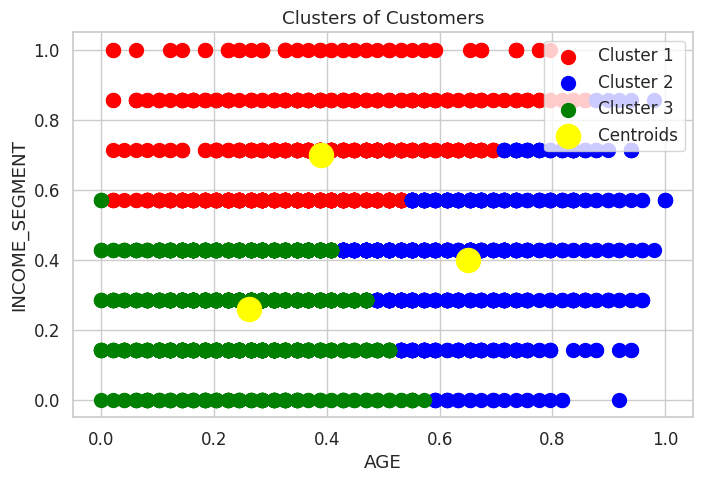

In [306]:
plt.scatter(pca_df.iloc[yp==0, 0], pca_df.iloc[yp==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(pca_df.iloc[yp==1, 0], pca_df.iloc[yp==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(pca_df.iloc[yp==2, 0], pca_df.iloc[yp==2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], s=300, c='yellow', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('AGE')
plt.ylabel('INCOME_SEGMENT')
plt.legend()
plt.show()

In [396]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [403]:
X = df4.copy()
X['clusters'] = yp
X = X.drop('ISSUANCE_MONTH',axis=1)
X

,AGE,EDUCATION,OCC,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,clusters
0,27,2,7,5,0,6,0
1,58,0,6,4,2,5,1
2,52,2,6,5,0,5,1
3,52,1,1,3,2,2,1
4,34,0,7,6,3,6,0
...,...,...,...,...,...,...,...
4495,36,1,6,4,2,3,2
4496,30,1,1,3,0,3,2
4497,27,0,1,3,2,4,2
4498,42,0,1,7,0,4,0


In [404]:
y = df3.PROD_CATEGORY
y

0       1
1       2
2       1
3       1
4       2
       ..
4495    1
4496    1
4497    1
4498    1
4499    1
Name: PROD_CATEGORY, Length: 3904, dtype: int64

In [405]:
model_params = {
    'svm': {
        'model': SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    },
    'naive_bayes' : {
        'model' : GaussianNB(),
        'params': {}
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3,5,6],
            'weights': ['uniform', 'distance']
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy'],
            
        }
    }
}

In [406]:
scores = []

for model_name, model_par in model_params.items():
    clf =  GridSearchCV(model_par['model'], model_par['params'], cv=10, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.667004,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.611159,{'n_estimators': 10}
2,logistic_regression,0.662910,{'C': 1}
3,naive_bayes,0.627307,{}
4,knn,0.633708,"{'n_neighbors': 6, 'weights': 'uniform'}"
5,decision_tree,0.595300,{'criterion': 'entropy'}


In [407]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
lr = LogisticRegression(solver='liblinear', multi_class='auto', C=5)
lr.fit(X_train, y_train)
actual = y_test
predicted = lr.predict(X_test)
metrics.r2_score(actual, predicted), metrics.mean_absolute_error(actual, predicted), np.sqrt(metrics.mean_squared_error(actual, predicted))

(-0.15712420270202387, 0.3418693982074264, 0.6145900020978352)

In [408]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
lr = SVC(C = 1, kernel='rbf')
lr.fit(X_train, y_train)
actual = y_test
predicted = lr.predict(X_test)
metrics.accuracy_score(actual,predicted), metrics.r2_score(actual, predicted), metrics.mean_absolute_error(actual, predicted), np.sqrt(metrics.mean_squared_error(actual, predicted))

(0.647887323943662,
 -0.006726352301490657,
 0.352112676056338,
 0.5933908290969266)

In [409]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
lr = LogisticRegression(solver='liblinear', multi_class='auto', C=5)
lr.fit(X_train, y_train)
actual = y_test
predicted = lr.predict(X_test)
metrics.accuracy_score(actual,predicted), metrics.r2_score(actual, predicted), metrics.mean_absolute_error(actual, predicted), np.sqrt(metrics.mean_squared_error(actual, predicted))

(0.6709346991037132,
 -0.14102386922272014,
 0.34571062740076824,
 0.6156307987826236)

In [410]:
from sklearn.model_selection import cross_val_score
cross_val_score(LogisticRegression(solver='liblinear', multi_class='auto', C=5), X, y, cv=10).mean()

0.6593212669683259

In [411]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(C=5, kernel='rbf'), X, y, cv=10).mean()

0.6657308675978755

In [412]:
from sklearn.model_selection import cross_val_score
cross_val_score(SVC(C=5, kernel='rbf'), X, y, cv=10).mean()

0.6657308675978755

In [358]:
df_test = test.copy()
df_test.head()

,ID,AGE,EDUCATION,OCC,PINCODE,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
0,7378,40,graduate_plus,business,581110,4,Medium,4,Nov-21
1,9511,44,graduate_plus,business,282002,5,High,4,Mar-22
2,9642,51,graduate_plus,salaried_pvt,751020,4,High,5,Mar-22
3,6896,48,graduate_plus,professional,834001,3,High,5,Sep-21
4,9833,30,graduate_plus,business,711404,3,Very_low,4,Mar-22


In [308]:
df_test = df_test.drop(['ID', 'PINCODE'], axis=1)
df_test.head()
print(df_test.shape)

(500, 7)


In [309]:
print(len(df_test[df_test.PROSPERITY_INDEX_BAND=='Missing']))
print(len(df_test[df_test.EDUCATION=='missing']))
print(len(df_test[df_test.OCC=='missing']))

12
35
1


In [310]:
df_test.drop(df_test[df_test['PROSPERITY_INDEX_BAND'] == 'Missing'].index, inplace=True)
df_test.drop(df_test[df_test['EDUCATION'] == 'missing'].index, inplace=True)
df_test.drop(df_test[df_test['OCC'] == 'missing'].index, inplace=True)
df_test.shape

(453, 7)

In [311]:
df_test.drop(df_test[df_test['INCOME_SEGMENT'] == -99].index, inplace=True)
df_test.shape

(452, 7)

In [312]:
df_test['EDUCATION'] = le.fit_transform(df_test['EDUCATION'])
df_test['OCC'] = le.fit_transform(df_test['OCC'])
df_test['PROSPERITY_INDEX_BAND'] = le.fit_transform(df_test['PROSPERITY_INDEX_BAND'])
df_test['ISSUANCE_MONTH'] = le.fit_transform(df_test['ISSUANCE_MONTH'])
df_test.head()

,AGE,EDUCATION,OCC,INCOME_SEGMENT,PROSPERITY_INDEX_BAND,QUALITY_SCORE_BAND,ISSUANCE_MONTH
0,40,0,1,4,2,4,9
1,44,0,1,5,0,4,7
2,51,0,6,4,0,5,7
3,48,0,3,3,0,5,11
4,30,0,1,3,4,4,7


scaler = StandardScaler()
scaler_arr = scaler.fit_transform(pca_df)
scaler_arr